1. Import pandas, matplotlib.pyplot, stats from scipy
2. Load the Hospital Admissions dataset into a dataframe.
3. Answer the following questions:
    1. What are the column headers or features in this data set?
    
    2. How many features are floats? How many are integers?
    
    3. Which features are objects (non-numeric variables)?
    
    4. What are the possible 'values' for insurance type?
    
    5. Show the summary statistics for the admission length.
     
    6. What is the most common admission type, insurance type, religion type, race, and diagnosis (Dx)?
    
    7. Show a histogram for admission days (with appropriate labels, titles, etc), and also show a histogram for admission days on a log scale. Describe what you see.
    
    8. Compare the average length of admission between those who died versus those who did not die. Show a visualization, with appropriate labels, titles, etc.
    
    9. Describe the association between death and insurance type and show a visualization or test.


## 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%config InlineBackend.figure_format = 'svg' # 3000 x 2000 display means I had to do it, sorry for your load times

## 2


In [2]:
filepath_hospital = 'exploratory data analysis/HospitalAdmissionsData.csv'
data = pd.read_csv(filepath_hospital)

# 3

## a
What are the column headers or features in this data set?

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   58863 non-null  int64  
 1   AdmissionLengthDays  58863 non-null  float64
 2   Death_1              58863 non-null  int64  
 3   Admission_Type       58863 non-null  object 
 4   Insurance_Type       58863 non-null  object 
 5   EnglishLanguage_1    58863 non-null  int64  
 6   Religion_Type        58408 non-null  object 
 7   Married_1            58863 non-null  int64  
 8   Race                 58863 non-null  object 
 9   Dx                   58863 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [4]:
data.head()

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda


## b. 
How many features are floats? How many are integers?

1 float, 4 integers

## c. 
Which features are objects (non-numeric variables)?

In [5]:
for category in data:
    if data[category].dtype == 'object':
        print(category)

Admission_Type
Insurance_Type
Religion_Type
Race
Dx


## d
What are the possible 'values' for insurance type?

In [6]:
data["Insurance_Type"].unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

## e
Show the summary statistics for the admission length.

In [7]:
data["AdmissionLengthDays"].describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

## f
What is the most common admission type, insurance type, religion type, race, and diagnosis (Dx)?

In [8]:
for category in data:
    if data[category].dtype == 'object':
        print(category + ": " + data[category].mode())

0    Admission_Type: emergency
dtype: object
0    Insurance_Type: medicare
dtype: object
0    Religion_Type: catholic
dtype: object
0    Race: white
dtype: object
0    Dx: newborn
dtype: object


## g
Show a histogram for admission days (with appropriate labels, titles, etc), and also show a histogram for admission days on a log scale. Describe what you see.

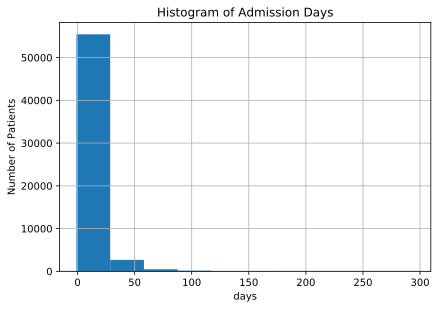

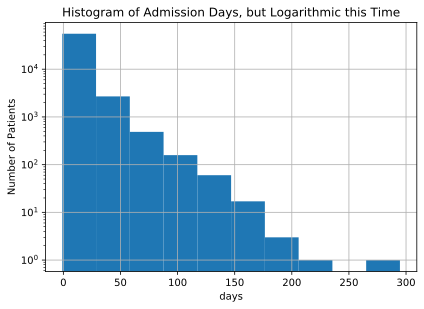

In [9]:
fig1 = data["AdmissionLengthDays"].hist();
plt.tight_layout() 
plt.title('Histogram of Admission Days')
plt.xlabel('days')
plt.ylabel('Number of Patients')
plt.show()

fig2 = data["AdmissionLengthDays"].hist();
plt.tight_layout() 
plt.title('Histogram of Admission Days, but Logarithmic this Time')
plt.xlabel('days')
plt.ylabel('Number of Patients')
plt.yscale('log')
plt.show()

here we see an inverse relationship between number of days and the number of patients who stayed that long. As the number of days in the hospital increases, it appears that the number of patients who stayed that long decreased exponentially.

## h
Compare the average length of admission between those who died versus those who did not die. Show a visualization, with appropriate labels, titles, etc.

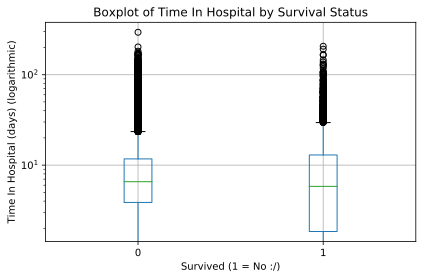

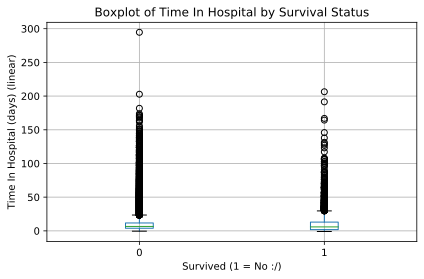

In [10]:
data.boxplot(column='AdmissionLengthDays', by='Death_1')
plt.suptitle('') # removed default subtitle, it overlaps with title
plt.title('Boxplot of Time In Hospital by Survival Status')
plt.xlabel('Survived (1 = No :/)')
plt.ylabel('Time In Hospital (days) (logarithmic)')
plt.yscale('log')
plt.tight_layout()
plt.show()

data.boxplot(column='AdmissionLengthDays', by='Death_1')
plt.suptitle('') # removed default subtitle, it overlaps with title
plt.title('Boxplot of Time In Hospital by Survival Status')
plt.xlabel('Survived (1 = No :/)')
plt.ylabel('Time In Hospital (days) (linear)')
plt.yscale('linear')
plt.tight_layout()
plt.show()

There does not seem to be any obvious relationship between the time spent in the hospital and the survival status. The means are roughly the same, however those who didn't survive seem to have a higher likelihood of spending more time in the hospital. The means are roughly similar. However, it's difficult to say with so many "outliers".

## I
Describe the association between death and insurance type and show a visualization or test.

In [11]:
DataDeathInsurance = pd.crosstab(data.Death_1, data.Insurance_Type)
print(DataDeathInsurance)

chi= stats.chi2_contingency(DataDeathInsurance)
print(chi)

Insurance_Type  government  medicaid  medicare  private  self pay
Death_1                                                          
0                     1691      5400     24253    21152       515
1                       90       381      3904     1382        95
(990.8535593949656, 3.425615316200906e-213, 4, array([[ 1603.93780473,  5206.26864074, 25357.70733738, 20293.73076466,
          549.35545249],
       [  177.06219527,   574.73135926,  2799.29266262,  2240.26923534,
           60.64454751]]))


The p-value of this chi-squared test is effectively zero, indicating that there's some relationship between insurance type and death  rates. The null hypothesis of no relationship is rejected.